# Divide a Reduced Sample Set into Two Clusters

Here, we try to divide a minimal sample into two clusters and for this task compare k-means with DBSCAN.

We expect for $g_{BB}=g_{CC}=g_{BC}=0$ that there are only two relevant correlation patterns. Namely, a correlated correlation pattern when $g_{AB} \cdot g_{AC} > 0$ and an anti-correlated correlation pattern if $g_{AB} \cdot g_{AC} < 0$.
Therefore, we reduce the samples set according to the condition $g_{BB}=g_{CC}=g_{BC}=0$ and apply the clustering algorithms. 
The aim is to determine which algorithm is capable to capture the correlation/anti-correlation pattern.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import helper_fcts

## 1. Reduce the sample set

Filter data according to $g_{BB}=g_{CC}=g_{BC}=0$, furthermore, for a finite correlation we need $g_{AB}, g_{AC} \neq 0$, otherwise the correlation matrix is zero be default!

In [2]:
df_pca = pd.read_pickle('df_main_std_pca_50.p')

mask = (
    (df_pca.loc[:, 'gBB'] == 0) &
    (df_pca.loc[:, 'gCC'] == 0) &
    (df_pca.loc[:, 'gBC'] == 0) &
    (df_pca.loc[:, 'gAB'] != 0) &
    (df_pca.loc[:, 'gAC'] != 0)
)

df_red = df_pca.loc[mask, :].copy()


features = df_red.iloc[:, 6:]


In [3]:
# number of samples:
features.shape

(116, 50)

## 2. K-Means

Check out *within-cluster sum of squares*values

In [4]:
wcss = []
for number_of_clusters in range(1, 10):
    model = KMeans(
        n_clusters=number_of_clusters,
        random_state=0
    )
    model.fit(features)
    wcss.append(model.score(features))

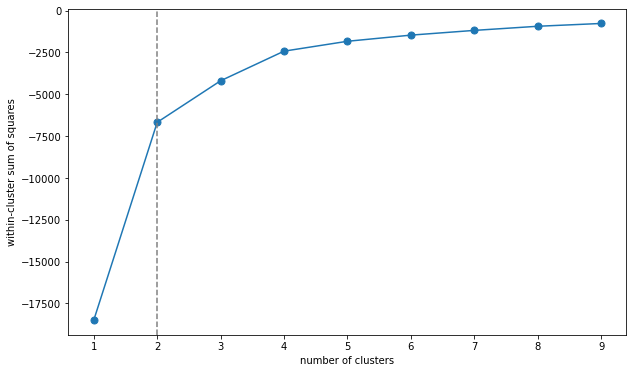

In [5]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.plot(range(1, 10), wcss, marker='o', markersize=7)

ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster sum of squares')
ax.axvline(2, color='gray', ls='--');

This WCSS value suggests that there might be more than two clusters. However, we will proceed with a model that considers only two clusters:

In [6]:
n_clusters = 2

model = KMeans(
    n_clusters=n_clusters,
    random_state=0
)

model.fit(features)

df_red.loc[:, 'cluster kmeans'] = model.labels_

# combine parameters
df_red.loc[:, 'gAB * gAC'] = df_red.loc[:, 'gAB'] * df_red.loc[:, 'gAC']


Plot some examples:

### 2.1 Plot Examples for Cluster 0

sample 0 gBB=0.0, gCC=0.0, gAB=1.0, gAC=-0.8, gBC=0.0 index: 13930
sample 1 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=0.6, gBC=0.0 index: 698
sample 2 gBB=0.0, gCC=0.0, gAB=1.0, gAC=-0.4, gBC=0.0 index: 13952
sample 3 gBB=0.0, gCC=0.0, gAB=-0.4, gAC=1.0, gBC=0.0 index: 4712
sample 4 gBB=0.0, gCC=0.0, gAB=0.4, gAC=-0.2, gBC=0.0 index: 9971


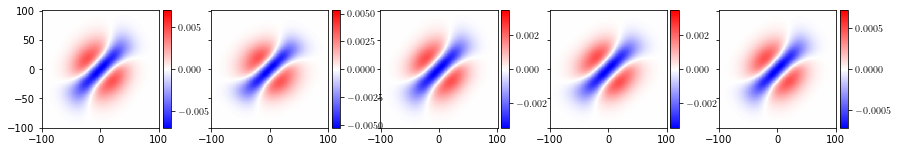

In [7]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster kmeans', cluster_id=0, seed=1)

sample 0 gBB=0.0, gCC=0.0, gAB=0.6, gAC=-0.6, gBC=0.0 index: 11280
sample 1 gBB=0.0, gCC=0.0, gAB=-0.5, gAC=0.5, gBC=0.0 index: 15583
sample 2 gBB=0.0, gCC=0.0, gAB=0.5, gAC=-0.5, gBC=0.0 index: 16823
sample 3 gBB=0.0, gCC=0.0, gAB=0.4, gAC=-0.2, gBC=0.0 index: 9971
sample 4 gBB=0.0, gCC=0.0, gAB=-0.5, gAC=1.0, gBC=0.0 index: 15588


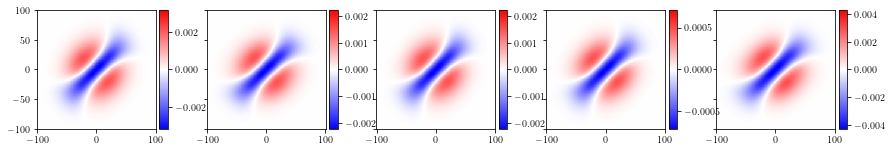

In [8]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster kmeans', cluster_id=0, seed=2)

### 2.2 Plot Examples for Cluster 1

sample 0 gBB=0.0, gCC=0.0, gAB=0.2, gAC=-0.2, gBC=0.0 index: 8640
sample 1 gBB=0.0, gCC=0.0, gAB=0.4, gAC=0.8, gBC=0.0 index: 10026
sample 2 gBB=0.0, gCC=0.0, gAB=1.0, gAC=1.0, gBC=0.0 index: 17463
sample 3 gBB=0.0, gCC=0.0, gAB=0.2, gAC=0.4, gBC=0.0 index: 8673
sample 4 gBB=0.0, gCC=0.0, gAB=-0.6, gAC=-0.8, gBC=0.0 index: 3283


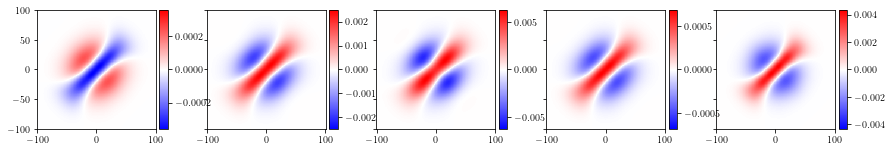

In [9]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster kmeans', cluster_id=1, seed=0)

sample 0 gBB=0.0, gCC=0.0, gAB=0.4, gAC=1.0, gBC=0.0 index: 10037
sample 1 gBB=0.0, gCC=0.0, gAB=-1.0, gAC=-1.0, gBC=0.0 index: 610
sample 2 gBB=0.0, gCC=0.0, gAB=1.0, gAC=0.2, gBC=0.0 index: 13985
sample 3 gBB=0.0, gCC=0.0, gAB=-0.5, gAC=-0.5, gBC=0.0 index: 15573
sample 4 gBB=0.0, gCC=0.0, gAB=-0.2, gAC=-0.4, gBC=0.0 index: 5967


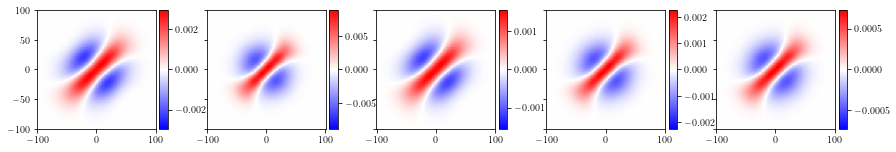

In [10]:
helper_fcts.plot_5_random_cluster_examples(df_features=df_red, cluster_col='cluster kmeans', cluster_id=1, seed=2)

### 2.3 Plot an Overview with respect to gAB, gAC

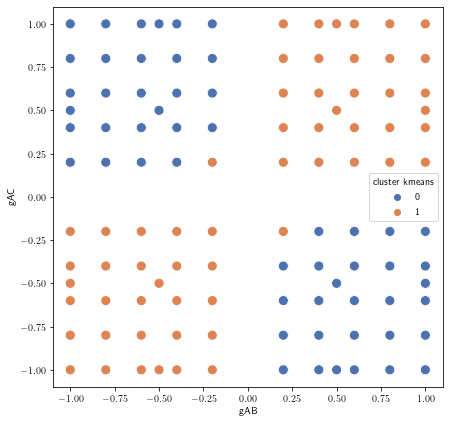

In [11]:
fig, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(
    x='gAB',
    y='gAC',
    hue='cluster kmeans',
    data=df_red,
    palette='deep',
    alpha=1,
    ax=axes,
    s=100
);

### 2.4 Summary of K-Means

The clustering algorithm works partially well. However, two falsely classified samples can be identified in the overview plot. These are two samples assigned to cluster 1 (orange dots) lying on the off-diagoanl of the overview plot with $g_{AB}$ ($g_{AC}$) on the x-axis (y-axis).

## 3. DBSCAN

### 3.1 Hyperparameter tuning with K-Nearest Neighbours

For each data point calculate the distance to the $k$-th neighbor. Then sort the values. We are interested in the distance associated with the appearance of a *knee* in the plot (elbow point). Since the knee potentially represents a change from a core point (in dense regions) to noise points (in sparser regions) and suggests a natural cut-off for clustering.

Note that a rule of thumb for the min_samples in DBSCAN is: min_samples = 2*number of features = 20

Good starting point for k-th nearest neighbor: $k=\sqrt{N}$, where $N$ is the number of data points.

In [12]:
def evaluate_DBSCAN(min_samples, eps):
    """Make sns scatterplot for given hyperparameters.
    
    Args:
        min_samples (int): number of minimal samples for cluster
        eps (float): 
    
    
    """
    model_db = DBSCAN(eps=eps, min_samples=min_samples)
    model_db.fit(features)

    # Scatterplot of data with obtained labels
    fig, axes = plt.subplots(figsize=(7, 7))

    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=model_db.labels_,
        data=df_red,
        palette='deep',
        alpha=1,
        ax=axes,
        s=150
    )
    
    axes.set_title(f'min samples={min_samples}, seps={eps:.3f}')

    plt.show()

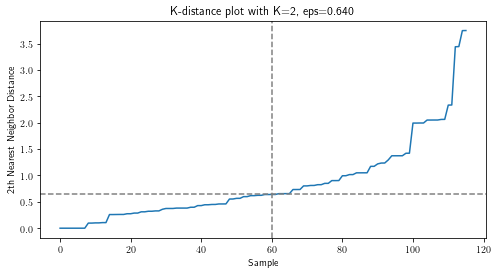

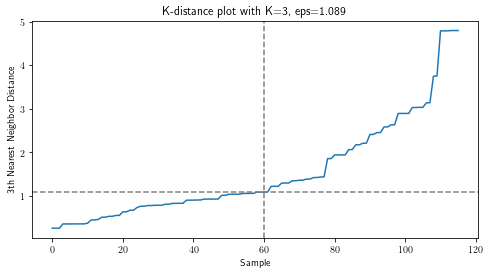

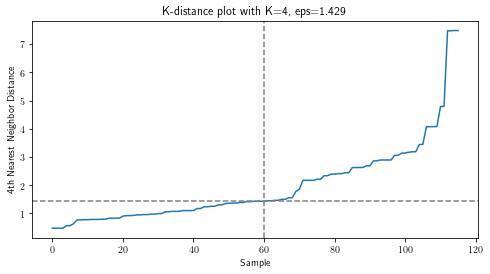

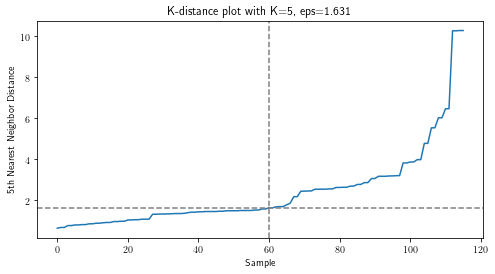

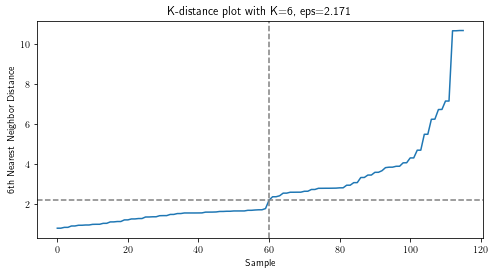

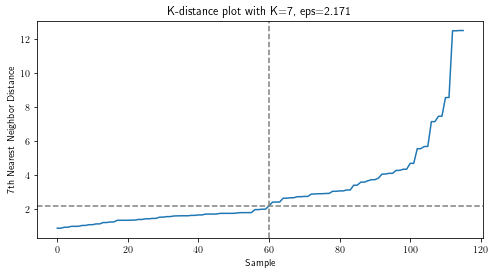

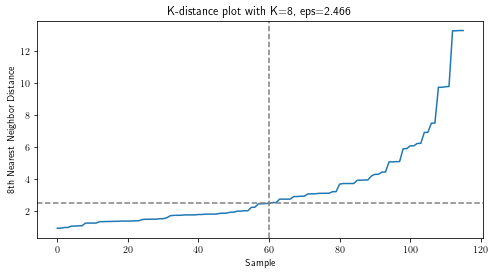

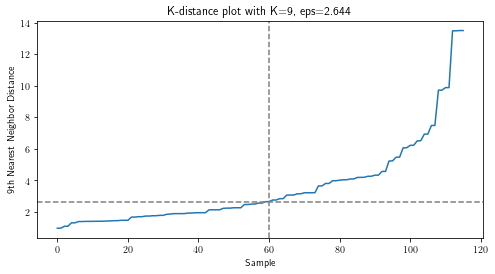

In [13]:
for k in range(2, 10):
    helper_fcts.plot_kNN_distance(features, k=k, elbowpoint=60)

### k=2

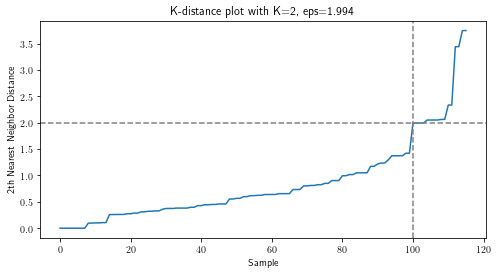

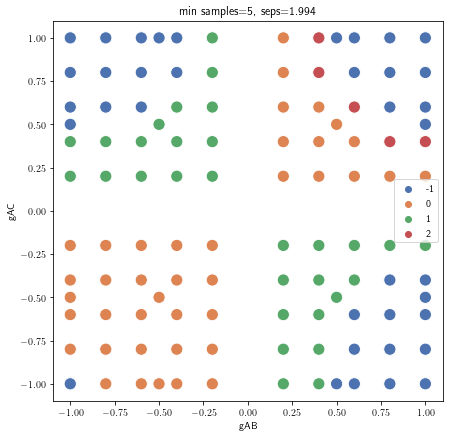

In [14]:
eps_k2 = helper_fcts.plot_kNN_distance(features, k=2, elbowpoint=100)
evaluate_DBSCAN(min_samples=5, eps=eps_k2)

### k=3

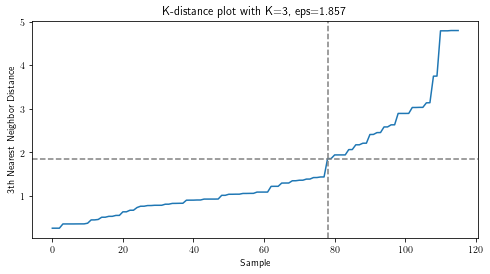

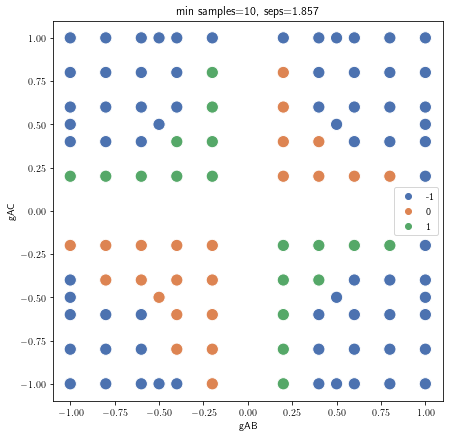

In [15]:
eps_k3 = helper_fcts.plot_kNN_distance(features, k=3, elbowpoint=78)
evaluate_DBSCAN(min_samples=10, eps=eps_k3)

### k=4

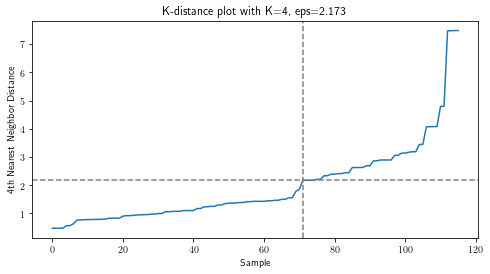

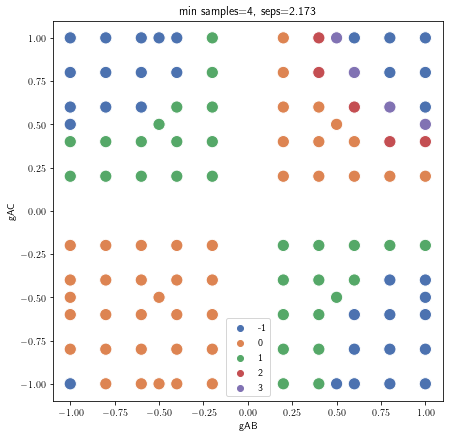

In [16]:
eps_k4 = helper_fcts.plot_kNN_distance(features, k=4, elbowpoint=71)
evaluate_DBSCAN(min_samples=4, eps=eps_k4)

### k=5

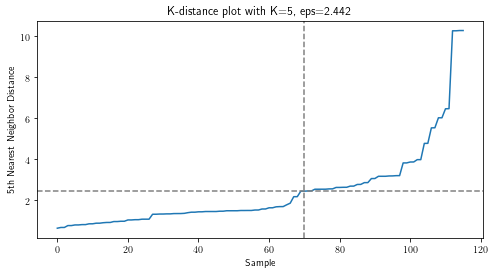

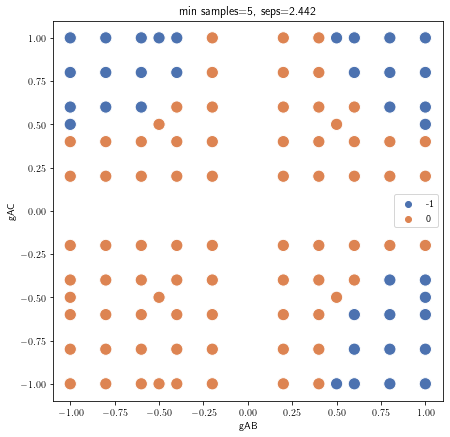

In [17]:
eps_k5 = helper_fcts.plot_kNN_distance(features, k=5, elbowpoint=70)
evaluate_DBSCAN(min_samples=5, eps=eps_k5)

### Summary DBSCAN

No hyper-parameter setting was able to uniquly classify all data points. The best result is obtained with min_samples=10 and eps=2.1. However, in this case there were many outliers.